In [59]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

sns.set()

In [66]:
# Read in and view raw input file
data = pd.read_csv("emails_as_csv_3367.csv")
data

,From,To,Subject,Date & Time Received,PDF Email Body Link,Email Text,Related
0,mail-noreply@google.com,rachitpareek@berkeley.edu,"The best of Gmail, wherever you are",5/1/18,https://drive.google.com/a/berkeley.edu/file/d...,Hi Rachit\n\nGet the official Gmail app\n\nThe...,0.0
1,mail-noreply@google.com,rachitpareek@berkeley.edu,Tips for using your new inbox,5/1/18,https://drive.google.com/a/berkeley.edu/file/d...,Hi Rachit\n\nWelcome to your Gmail inbox\n\nSa...,0.0
2,calmessages@berkeley.edu,calmessages_communication@lists.berkeley.edu,Report of the Free Speech Commission,5/2/18,https://drive.google.com/a/berkeley.edu/file/d...,"Dear campus community,\n\nI am delighted to sh...",0.0
3,shipcomms@berkeley.edu,rachitpareek@berkeley.edu,Fall 2018 SHIP Benefits and Waiver Info,5/3/18,https://drive.google.com/a/berkeley.edu/file/d...,"As a non-academic condition of enrollment, you...",0.0
4,orres@berkeley.edu,rachitpareek@berkeley.edu,California Residence for Tuition Purposes,5/3/18,https://drive.google.com/a/berkeley.edu/file/d...,"May 3, 2018\nRE: California R...",0.0
...,...,...,...,...,...,...,...
9645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9648,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Basic pre-processing
# 1. Select only relevant columns
data = data[["Date & Time Received", "From", "Subject", "Email Text", "Related"]].dropna()
# Regex to help extract the sender domain from the emails
data["From"] = data["From"].apply((lambda x: re.findall("(?<=@)[^.]+(?=\.)", x)[0]))
data["Email Text"] = data["Email Text"].str.replace("\n", " ")
data

,Date & Time Received,From,Subject,Email Text,Related
0,5/1/18,google,"The best of Gmail, wherever you are",Hi Rachit Get the official Gmail app The bes...,0.0
1,5/1/18,google,Tips for using your new inbox,Hi Rachit Welcome to your Gmail inbox Save e...,0.0
2,5/2/18,berkeley,Report of the Free Speech Commission,"Dear campus community, I am delighted to shar...",0.0
3,5/3/18,berkeley,Fall 2018 SHIP Benefits and Waiver Info,"As a non-academic condition of enrollment, you...",0.0
4,5/3/18,berkeley,California Residence for Tuition Purposes,"May 3, 2018 RE: California Re...",0.0
...,...,...,...,...,...
3362,3/23/19,gradescope,"Your Midterm 2 for CS 61A, Spring 2019 has bee...","Hi Rachit Pareek, Your Midterm 2 for CS 61A, ...",0.0
3363,3/24/19,linkedin,"Rachit, please add me to your LinkedIn network","Hi Rachit, I'd like to join your LinkedIn netw...",0.0
3364,3/24/19,piazza,03/24/19 Daily Digest for CS 61A on Piazza,03/24/19 Daily Digest for CS 61A: Structure an...,0.0
3365,3/24/19,zipcar,Your first Ziptrip - the one you always remember,Your upcoming ...,0.0


In [83]:
top_senders = data["From"].value_counts().to_frame().head(15).rename(columns={"From": "Counts"})
top_senders

,Counts
berkeley,836
piazza,338
notifications,206
instructure,199
gmail,186
haas,174
linkedin,139
mail,98
box,64
ijet,57


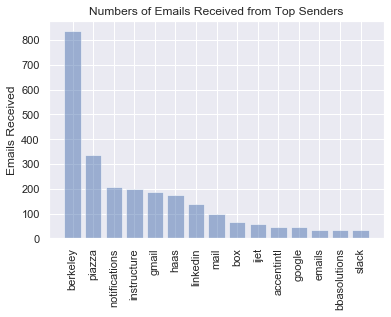

In [88]:
plt.bar(np.arange(len(top_senders)), np.array(top_senders["Counts"]), align='center', alpha=0.5)
plt.xticks(np.arange(len(top_senders)), np.array(top_senders.index), rotation='vertical')
plt.ylabel('Emails Received')
plt.title('Numbers of Emails Received from Top Senders')
plt.show()

In [91]:
tokenizer = RegexpTokenizer('[^\d_\W]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer=tokenizer.tokenize)
word_counts = cv.fit_transform(data['Email Text'])

AttributeError: 'CountVectorizer' object has no attribute 'shape'

In [11]:
test_sizes = []
accuracies = [] # total correct - obv high, as most are correctly negative
precisions = [] # how many selected items are relevant?
recalls = [] # how many relevant items are selected?
for size in range(5, 96):
    X_train, X_test, y_train, y_test = train_test_split(
        text_counts, data['Related'], test_size=size/100, random_state=3)
    test_sizes.append(size)
    clf = MultinomialNB().fit(X_train, y_train)
    predicted= clf.predict(X_test)
    accuracies.append(metrics.accuracy_score(y_test, predicted))
    precisions.append(metrics.precision_score(y_test, predicted))
    recalls.append(metrics.recall_score(y_test, predicted))
    #could also show precision and the 4-way table

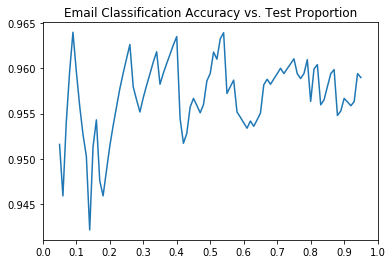

In [186]:
plt.plot([i/100 for i in test_sizes], accuracies)
plt.title("Email Classification Accuracy vs. Test Proportion")
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.show()

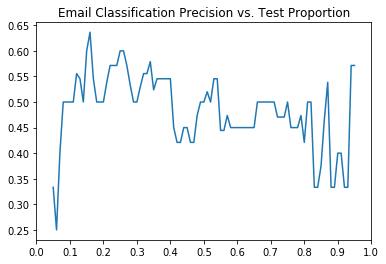

In [185]:
plt.plot([i/100 for i in test_sizes], precisions)
plt.title("Email Classification Precision vs. Test Proportion")
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.show()

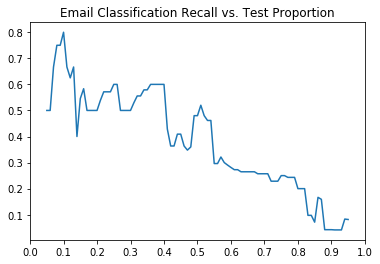

In [187]:
plt.plot([i/100 for i in test_sizes], recalls)
plt.title("Email Classification Recall vs. Test Proportion")
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.show()